# Using Jupyter

_Parts of this notebook are adapted from the Jupyter documentation_

## Introduction

The Jupyter Notebook is an interactive computing environment that enables users to author notebook documents that include executable code, markdown text with MathJax, multimedia, and static and interactive charts. These documents provide a complete and self-contained record of a computation that can be converted to various formats and shared with others.

Documentation is available at https://jupyter-notebook.readthedocs.io/en/stable/

The Jupyter Notebook combines three components:

- **The notebook web application**: An interactive web application for writing and running code interactively and authoring notebook documents.
- **Kernels**: Separate processes started by the notebook web application that runs users’ code in a given language and returns output back to the notebook web application. The kernel also handles things like computations for interactive widgets, tab completion and introspection.
- **Notebook documents**: Self-contained documents (JSON text in files with .ipynb extension) that contain a representation of all content visible in the notebook web application, including inputs and outputs of the computations, narrative text, equations, images, and rich media representations of objects. Each notebook document has its own kernel.

Notebooks consist of a linear sequence of cells. There are four basic cell types:

- **Code cells**: Input and output of live code that is run in the kernel
- **Markdown cells**: Narrative text with embedded LaTeX equations
- **Heading cells**: 6 levels of hierarchical organization and formatting (I usually just put my headings in markdown cells but using heading cells can be useful for outline views of a document)
- **Raw cells**: Unformatted text that is included, without modification, when notebooks are converted to different formats using nbconvert



## Running Jupyter

Install with:

    conda install notebook
    
and run with:

    jupyter notebook
    
This should open a web browser pointing at the **notebook dashboard**, which displays the notebooks and files in the current directory.

![https://jupyter-notebook.readthedocs.io/en/stable/_images/dashboard_files_tab.png](https://jupyter-notebook.readthedocs.io/en/stable/_images/dashboard_files_tab.png)

The top of the notebook list displays clickable breadcrumbs of the current directory. By clicking on these breadcrumbs or on sub-directories in the notebook list, you can navigate your file system.

To create a new notebook, click on the “New” button at the top of the list and select a kernel from the dropdown. Which kernels are listed depend on what’s installed on the server. Some of the kernels in the screenshot below may not exist as an option to you.

The notebook list shows green “Running” text and a green notebook icon next to running notebooks (as seen below). Notebooks remain running until you explicitly shut them down; closing the notebook’s page is not sufficient.

To shutdown, delete, duplicate, or rename a notebook check the checkbox next to it and an array of controls will appear at the top of the notebook list.

To see all of your running notebooks along with their directories, click on the “Running” tab. Here you can see the running kernels and choose to shut them down.

If you create a new notebook or open an existing one, you will be taken to the notebook user interface, which allows you to run code and author notebook documents interactively. The notebook UI has the following main areas:

- Menu
- Toolbar
- Notebook area and cells

The notebook has an interactive tour of these elements that can be started in the “Help:User Interface Tour” menu item.

The notebook UI is modal. If you click in a cell or press ENTER you enter "edit mode" and can type into the cell. If you click outside a cell or press ESC you will be in "command mode" which allows you to edit the notebook structure.

You can execute a code cell or render a markdown cell by pressing Shift-ESC. Focus will move to the next cell (a new cell will be created if you executed the last cell).



## Tutorial

Basics: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html

http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/

## Markdown

Jupyter supports GitHub-flavored markdown; see https://guides.github.com/pdfs/markdown-cheatsheet-online.pdf for a quick reference.


## Re-ordering, Inserting, Deleting and Executing Cells

![https://jupyter-notebook.readthedocs.io/en/stable/_images/menubar_toolbar.png](https://jupyter-notebook.readthedocs.io/en/stable/_images/menubar_toolbar.png)

The notebook toolbar has options to save the notebook, add (+), delete (cut) cells, copy cells, paste cells, move cells up or down in the notebook, run the cell, interrupt or restart the kernel, and change the cell type.

To run a cell that has focus, use Shift-Enter. The output of the execution will be added to the notebook. Try it now:

In [3]:
1+2+3+4

10

More generally, you can use Python `print` statements to print info to the cell outpout, or you can put a Python expression (often just a variable name) at the end of the code cell and have that print automatically. It's possible to extend this latter functionality to multiple expressions by executing this code in a cell:

```python
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
```

or, if you want this to happen automatically every time you start Jupyter, you can edit or create the file `~/.ipython/profile_default/ipython_config.py` and add the contents:

```python
c = get_config()

# Run all nodes interactively
c.InteractiveShell.ast_node_interactivity = "all"
```

If you end the last line with a semi-colon the output will be suppressed:

In [1]:
1+2+3+4;

The result of execution of the most recently executed cell is assigned to a special variable, '_':

In [4]:
print(_)

10


You can put a semicolon at the end of code in a cell to suppress the output. Try it:

In [5]:
1+2+3+4;

Note how the cells are marked with `In` and `Out`, and a count. The count allows you to keep track of the order in which cells were executed. `Out` is the result of execution, unless the execution of the cell resulted in some output to `stdout`/`stderr`; in this case that is shown instead with no `Out` label. Output to `stderr` is shown in red:

In [11]:
import sys
print('hello', file=sys.stderr)

hello


`In` and `Out` are also variables that contain the history of execution (`In` is a list/array of strings, while `Out` is a dictionary/hash table):

In [14]:
print(In)

['', '1+2+3+4;', 'print(_)', '1+2+3+4', 'print(_)', '1+2+3+4;', '1/0', 'jhd', "print >> stderr >> 'foo'", "get_ipython().magic('pinfo print')", "print('hello', file=sys.stderr)", "import sys\nprint('hello', file=sys.stderr)", "x = get_ipython().getoutput('ls -l')", 'print(x)', 'print(In)']


In [15]:
print(Out)

{3: 10}


## Executing Shell Commands

You can execute a sheel command in a cell by starting it with '!'. For example, if your notebook relies on certain packages, you may want to start with a cell that uses shell commands to pip install the dependencies.

Try it:

In [6]:
!ls -l

total 24016
-rw-r--r--  1 gwheeler  staff     12820 Nov 13 13:59 02 Using Jupyter.ipynb
-rw-r--r--  1 gwheeler  staff     70010 Nov 11 10:12 03 Python Overview.ipynb
-rw-r--r--  1 gwheeler  staff     41483 Nov 11 21:33 04 Exploratory Data Analysis.ipynb
-rw-r--r--  1 gwheeler  staff       581 Nov  9 20:18 05 Getting Started with PyCharm.ipynb
-rw-r--r--  1 gwheeler  staff      1115 Oct 30 13:03 06 Testing and Debugging.ipynb
-rw-r--r--  1 gwheeler  staff       581 Nov  9 20:19 07 Packaging Code.ipynb
-rw-r--r--  1 gwheeler  staff        72 Nov  9 20:17 08 Building a Dashboard with Spyre.ipynb
-rw-r--r--  1 gwheeler  staff       555 Oct 30 13:03 09 Simple ML Models - Regression and Decision Trees.ipynb
-rw-r--r--  1 gwheeler  staff       555 Oct 30 13:03 10 Basic NLP.ipynb
-rw-r--r--  1 gwheeler  staff     38174 Nov 11 21:06 100-pandas-puzzles.ipynb
-rw-r--r--@ 1 gwheeler  staff  12095457 Nov 11 20:55 NationalNames.csv.zip


It's possible to assign this to a variable:

In [12]:
x = !ls -l

In [13]:
print(x)

['total 24056', '-rw-r--r--  1 gram  staff       883 Oct 28 18:18 01 Getting Started', '-rw-r--r--  1 gram  staff     21694 Nov 19 11:49 02 Using Jupyter.ipynb', '-rw-r--r--  1 gram  staff     74026 Nov 16 16:48 03 Python Overview.ipynb', '-rw-r--r--  1 gram  staff     41587 Nov 16 16:48 04 Exploratory Data Analysis.ipynb', '-rw-r--r--  1 gram  staff      3701 Oct 30 06:04 04 Project Structure', '-rw-r--r--  1 gram  staff       581 Nov 16 16:48 05 Getting Started with PyCharm.ipynb', '-rw-r--r--  1 gram  staff      1115 Oct 29 06:17 06 Testing and Debugging.ipynb', '-rw-r--r--  1 gram  staff       581 Nov 16 16:48 07 Packaging Code.ipynb', '-rw-r--r--  1 gram  staff        72 Nov 16 16:48 08 Building a Dashboard with Spyre.ipynb', '-rw-r--r--  1 gram  staff       555 Oct 29 06:07 09 Simple ML Models - Regression and Decision Trees.ipynb', '-rw-r--r--  1 gram  staff       555 Oct 29 06:08 10 Basic NLP.ipynb', '-rw-r--r--  1 gram  staff     38174 Nov 16 16:48 100-pandas-puzzles.ipynb', '

## Checkpoints and Saving

The notebook is saved automatically periodically. Expplicitly saving the notebook from the toolbar or file menu actually creates a time-stamped "checkpoint", and you can revert to a saved checkpoint from the file menu. 

## Tips and Tricks


You can write math with MathJax. Try executing the next cell, which is a MarkDown cell:

$$ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $$

Pi is $\pi$ okay?

You can get help on a Python function (view its _docstring_) by following it with `?` in Jupyter:

In [11]:
import os

os.path.exists?

That requires you to execute the code; you can do the same without executing the whole cell by typing Shift-TAB after the function name. You can also use the built-in Python function `help`:

In [12]:
help(len)

Help on built-in function len in module builtins:

len(obj, /)
    Return the number of items in a container.



In [13]:
help(os.path.exists)

Help on function exists in module genericpath:

exists(path)
    Test whether a path exists.  Returns False for broken symbolic links



This works on your own functions too so writing docstrings is always recommended.

You can go a step further and use two ?? to get the source code of a function.

In [14]:
import pandas as pd
pd.concat??

Jupyter supports tab-completion; try it below:

In [15]:
from itertools import combinatio


More good tips here: https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

You can write presentations in Jupyter and even do live code in your presentation using Rise: https://github.com/damianavila/RISE

Here's an example, which is an overview of Jupyter :-) http://quasiben.github.io/dfwmeetup_2014/#/

For more advanced users, Jupyter can be extended and customized in multiple ways; you can read about them here: https://mindtrove.info/4-ways-to-extend-jupyter-notebook/

## Interesting Notebooks

See https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks

## Jupyter Shortcuts

| Keys | Action |
|------|--------|
|  Ctrl a    | Move cursor to line start       |
|  Ctrl e    | Move cursor to line end       |
|  Ctrl k    | Cut to end of line       |
| Ctrl u | Cut from start of line |
| Ctrl y | Pste cut text |
| Ctrl p | Access previous command in history |
| Ctrl n | Access next command in hsitory|
| Ctrl r | Reverse search through history |
| Ctrl c | Interrupt kernel |
| Ctrl Shift - | Split cell at cursor |
| Shift Down | Select next cell down (multi-select) |
| Shift Up | Select next cell up (multi-select) |

https://cdn.oreillystatic.com/pdf/jupyter-shortcuts.pdf

## Cell and Line Magics

There are numerous special commands called Ipython Magics that can be used to control things in Jupyter. These are either *line magics* that start with `%` or *cell magics* that start with `%%`. A line magic consists of a single line, while a cel magic consists of everything from the `%%` to the end of the cell.

`%load` can load code from external scripts. We will use that for hiding the answers to some exercises.

`%run` will let you run an external script or another notebook.

`%%time` at the start of a cell will time the execution of the cell and print a summary when done.  `%%timeit` will run the code repeatedly (100,000 times by default) and then show the mean of the top 3 times.

`%env` can be used to set environment variable values.

`%%writefile` writes the contents of a cell tro a file.

`%pycat` shows the syntax-highlighted contents of the specirfied Python file in a pop-up window.

`%%pdb` runs the contents of the cell under control of the Python debugger.

You can use `%lsmagic` to see all availble magics.

More documentation on magics is available here: http://ipython.readthedocs.io/en/stable/interactive/magics.html

A very common one for data science is `%matplotlib inline`; this is necessary if using the matplotlib or Seaborn plottting libraries to make sure the plots appear as cell outputs in the notebook. If you have a retina Mac you can use retina-resolution for plots by executing `%config InlineBackend.figure_format = 'retina'`.

## Custom Magics

You can easily create your own magics; they are just Python functions. You just need to import the appropriate Python decorators and then annotate your function. We're getting ahead of ourselves but a quick example should illustrate:

In [16]:
from IPython.core.magic import register_line_magic

@register_line_magic
def greet(line):
    print(f'Hello {line}!')

In [17]:
%greet Dave

Hello Dave!


Read more here: http://ipython.readthedocs.io/en/stable/config/custommagics.html



## Creating Presentations in Jupyter

RISE is an extension that allows you to create a slide deck in Jupyter and present it. Your deck can include live code that you execute, so it is great for Python programming talks :-). See https://github.com/damianavila/RISE for more details.

## The Jupyter Display System

Jupyter can display many different types of output from cells, not just text. This can be determined by the MIME type of the result, but you can use expplicit control too with the `IPython.display` module:

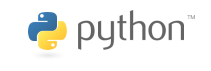

In [3]:
from IPython.display import display, Image

display(Image('https://www.python.org/static/community_logos/python-logo.png'))

## Jupyter-contrib-extensions

These are a collection of extensions to extend the functionality of Jupyter. You can install and configure them by executing:

In [ ]:
!pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master
!pip install jupyter_nbextensions_configurator
!jupyter contrib nbextension install --user
!jupyter nbextensions_configurator enable --user

## Jupyter Lab

Jupyter notebook is a mature and popular technology but the linear document format is limiting. Rather than try to fix this in the notebook, the Jupyter team have embarked on building an entirely new front end for Jupyter, called Jupyter Lab. You can run it with:

    jupyter lab
    
The main difference is that you have a tabbed interface all in one web page rather than multiple browser tabs for each notebook. Other than that you should have no problem using Jupyter Lab once you are comfortable with Jupyter Notebook. Use whichever you prefer but note that at the time of writing Jupyter Lab is still pre-release software.
